In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import kruskal, mannwhitneyu

from itertools import product
 

In [2]:
df = pd.read_csv('data/IST_corrected_clean.csv',  index_col= [0])

In [3]:
def print_stats(stat, p):
    print('stat = %.3f, p = %.3f' % (stat, p))
    if p > 0.05:
	    print('Probably the same distribution')
    else:
	    print('Probably different distributions')

# Hypothesis testing

+ aspirin vs non-aspirin
    + aspirin vs non-aspirin subdivided in prior aspirin
    + aspirin vs non-aspirin subdivided in hours between onset and randomisation (3, 6, 12, 24, 48)
+ heparin vs non-heparin
    + non vs low vs medium heparin
    + heparin vs non-heparin subdivided in prior heparin
    + heparin vs non-heparin subdivided in hours between onset and randomisation (3, 6, 12, 24, 48)
+ combination of aspirin and heparin
    + (significantly) different outcome than separate effects of aspirin and heparin

+ DASP14 - Aspirin given (Y/N)
+ HEP14 - Heparin given (L, M, None)
+ RXHEP14 - Heparin given (Y/N)

+ RHEP24 - Heparin 24h prior to stroke
+ RASP3 - Aspirin 3 days prior to stroke

## Aspirin vs  No aspirin



### Outcome after 14 days

The endpoint after 14 days is 'DDEAD'. It includes information whether a patient has passed away within 14 days or not.

In [20]:
df.DDEAD.value_counts()

N    16802
Y     1988
Name: DDEAD, dtype: int64

Group patients and their status concerning Aspirin treatment (Y/N) - and their outcome after 14 days.

In [156]:
group_asp14 = df.groupby('DASP14')['DDEAD'].apply(list)

In [157]:
group_asp14

DASP14
N    [N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...
Y    [N, N, N, N, N, N, Y, Y, N, N, N, N, N, N, N, ...
Name: DDEAD, dtype: object

In [18]:
stat, p = kruskal(group_asp14[0], group_asp14[1])
print('Kruskal Wallis')
print_stats(stat, p)

Kruskal Wallis
stat = 6641.986, p = 0.000
Probably different distributions


When comparing the groups by implementing the Kruskal Wallis Test, we see that there is a significant difference between patients who were given Aspirin in comparison to those who didn't, after 14 days. More patients that did not receive Aspirin passed away compared to those who received Aspirin.


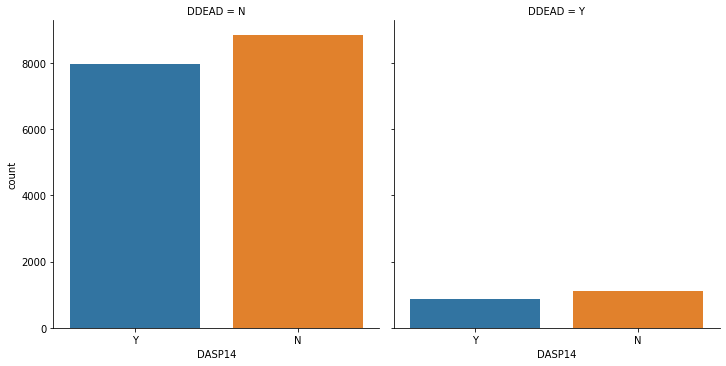

In [100]:
sns.catplot(x="DASP14", col="DDEAD", data=df,kind="count")

### Outcome after 6 months

There are two endpoints that are interesting after 6 months, that is 'FRECOVER', which is the information of full recovery, as well as 'FDEAD', which is information on patients who have passed away.

In [162]:
group_asp6 = df.groupby('DASP14')['FRECOVER'].apply(list)
print(group_asp6)
print()
stat, p = kruskal(group_asp6[0], group_asp6[1])
print('Kruskal Wallis')
print_stats(stat, p)

DASP14
N    [N, Y, N, N, N, Y, N, N, N, N, N, N, N, N, Y, ...
Y    [N, N, N, N, N, N, nan, nan, N, N, N, N, Y, N,...
Name: FRECOVER, dtype: object

Kruskal Wallis
stat = 2.839, p = 0.092
Probably the same distribution


No difference in terms of recovery when patients received aspirin or not. Though, there is a significant difference between patients who died and who received aspirin compared to those who did not.

In [166]:
group_asp6 = df.groupby('DASP14')['FDEAD'].apply(list)
print(group_asp6)
print()
stat, p = kruskal(group_asp6[0], group_asp6[1])
print('Kruskal Wallis')
print_stats(stat, p)

DASP14
N    [N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...
Y    [N, N, N, N, N, N, Y, Y, N, N, N, N, N, N, N, ...
Name: FDEAD, dtype: object

Kruskal Wallis
stat = 21.332, p = 0.000
Probably different distributions


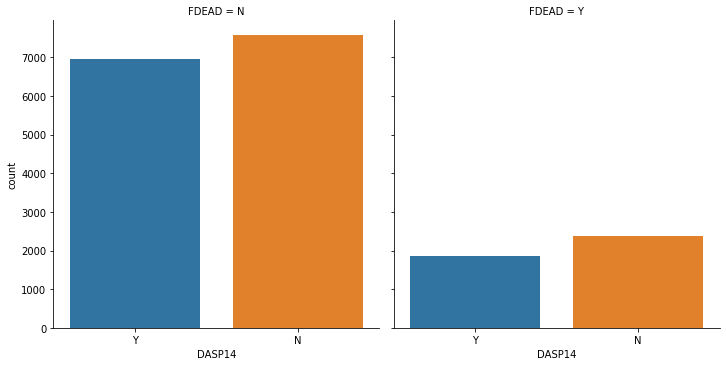

In [167]:
sns.catplot(x="DASP14", col="FDEAD", data=df,kind="count")

In [11]:
group_asp6 = df.groupby('DASP14')['OCCODE'].apply(list)
print(group_asp6)
print()
stat, p = kruskal(group_asp6[0], group_asp6[1])
print('Kruskal Wallis')
print_stats(stat, p)

DASP14
N    [Dependent, Recovered, Not recovered, Not reco...
Y    [Dependent, Dependent, Dependent, Not recovere...
Name: OCCODE, dtype: object

Kruskal Wallis
stat = 35.669, p = 0.000
Probably different distributions


After 6 months: Difference between patients who received Aspirin and those who did not. Patients who did not receive Aspirin were more likely to be dependent, not recover or pass away, 6 months after their (first) stroke.

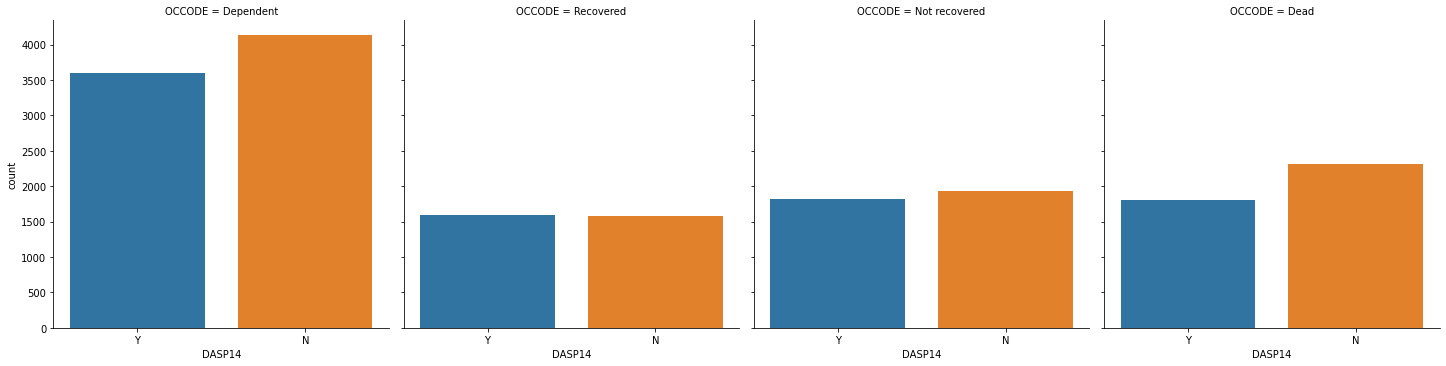

In [99]:
sns.catplot(x="DASP14", col="OCCODE", data=df,kind="count")

## Aspirin vs non-aspirin subdivided in prior aspirin
### Outcome after 14 days

In [81]:
list_asp_asp14 = df.groupby(by = ['RASP3','DASP14'])['DDEAD'].apply(list)

In [82]:
list_asp_asp14
# RASP3 DASP14
# 0: N N 
# 1: N Y
# 2: Y N
# 3: Y Y 

RASP3  DASP14
N      N         [Y, Y, N, N, N, N, N, N, N, N, N, N, N, N, N, ...
       Y         [N, N, N, N, N, N, N, N, N, N, N, N, N, N, Y, ...
Y      N         [N, N, N, N, Y, N, N, Y, N, N, N, N, Y, N, N, ...
       Y         [Y, N, N, Y, Y, N, Y, N, N, N, N, N, N, Y, N, ...
Name: DDEAD, dtype: object

In [58]:
print()
stat, p = kruskal(list_asp_asp14[0], list_asp_asp14[1],list_asp_asp14[2], list_asp_asp14[3])
print('Kruskal Wallis')
print_stats(stat, p)


Kruskal Wallis
stat = 13.881, p = 0.003
Probably different distributions


After 14 days: No difference between patients that were given Aspirin and additionally took Aspirin prior to their stroke, compared to patients the other groups.

In [83]:
iterator = product(enumerate(list_asp_asp14), enumerate(list_asp_asp14))
for (first_idx, first_group), (second_idx, second_group) in iterator:
    print(first_idx, second_idx)
    stat, p = mannwhitneyu(first_group, second_group)
    print_stats(stat, p)
    print()

0 0
stat = 27639612.500, p = 0.500
Probably the same distribution

0 1
stat = 24219986.000, p = 0.014
Probably different distributions

0 2
stat = 7331968.500, p = 0.407
Probably the same distribution

0 3
stat = 6572885.500, p = 0.000
Probably different distributions

1 0
stat = 24219986.000, p = 0.014
Probably different distributions

1 1
stat = 21720640.500, p = 0.500
Probably the same distribution

1 2
stat = 6449189.500, p = 0.109
Probably the same distribution

1 3
stat = 5895718.500, p = 0.021
Probably different distributions

2 0
stat = 7331968.500, p = 0.407
Probably the same distribution

2 1
stat = 6449189.500, p = 0.109
Probably the same distribution

2 2
stat = 1952288.000, p = 0.500
Probably the same distribution

2 3
stat = 1750253.000, p = 0.004
Probably different distributions

3 0
stat = 6572885.500, p = 0.000
Probably different distributions

3 1
stat = 5895718.500, p = 0.021
Probably different distributions

3 2
stat = 1750253.000, p = 0.004
Probably different distr

In [53]:
group_asp_asp = df.groupby(by = ['RASP3', 'DASP14'])
group_asp_asp['DDEAD'].value_counts()

RASP3  DASP14  DDEAD
N      N       N        6597
               Y         838
       Y       N        5924
               Y         667
Y      N       N        1757
               Y         219
       Y       N        1663
               Y         155
Name: DDEAD, dtype: int64

In [54]:
# RASP3 = n
rn_dn_n = group_asp_asp['DDEAD'].value_counts()[0]
rn_dn_y = group_asp_asp['DDEAD'].value_counts()[1]
rn_dy_n = group_asp_asp['DDEAD'].value_counts()[2]
rn_dy_y = group_asp_asp['DDEAD'].value_counts()[3]
ry_dn_n = group_asp_asp['DDEAD'].value_counts()[4]
ry_dn_y = group_asp_asp['DDEAD'].value_counts()[5]
ry_dy_n = group_asp_asp['DDEAD'].value_counts()[6]
ry_dy_y = group_asp_asp['DDEAD'].value_counts()[7]

In [55]:
print(f'Percentage of patients alive after 14 days:')
print()
print(f"--- No aspirin prior to stroke ---")
print(f'No aspirin during study: {round((rn_dn_n / (rn_dn_n + rn_dn_y) * 100),1)} %')
print(f'Aspirin during study: {round((rn_dy_n  / (rn_dy_n + rn_dy_y) * 100),1)} %')
print()
print(f"--- Aspirin prior to stroke ---")
print(f'No aspirin during study: {round(( ry_dn_n  / (ry_dn_n + ry_dn_y) * 100),1)} %')
print(f'Aspirin during study: {round((ry_dy_n  / (ry_dy_n + ry_dy_y) * 100),1)} %')

Percentage of patients alive after 14 days:

--- No aspirin prior to stroke ---
No aspirin during study: 88.7 %
Aspirin during study: 89.9 %

--- Aspirin prior to stroke ---
No aspirin during study: 88.9 %
Aspirin during study: 91.5 %



N N vs N Y
stat = 24219986.000, p = 0.014
Probably different distributions

N N vs Y Y
stat = 6572885.500, p = 0.000
Probably different distributions

N Y vs Y Y 
stat = 5895718.500, p = 0.021
Probably different distributions

Y N vs Y Y 
stat = 1750253.000, p = 0.004
Probably different distributions

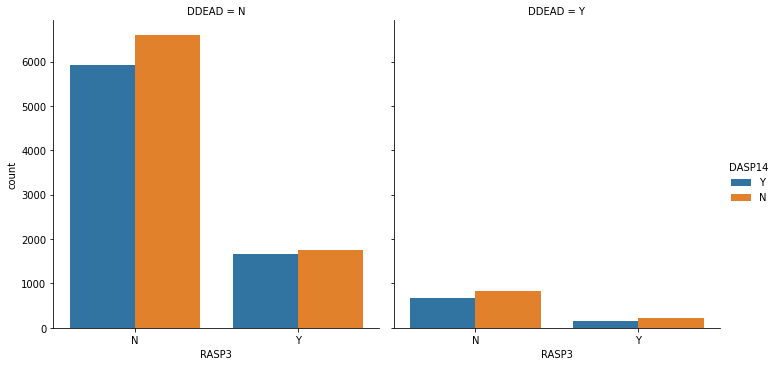

In [161]:
sns.catplot(x="RASP3", col="DDEAD", hue ='DASP14', data=df,kind="count")

### Outcome after 6 months

In [168]:
list_asp_asp6 = df.groupby(by = ['RASP3','DASP14'])['FRECOVER'].apply(list)

In [169]:
print()
stat, p = kruskal(list_asp_asp6[0], list_asp_asp6[1],list_asp_asp6[2], list_asp_asp6[3])
print('Kruskal Wallis')
print_stats(stat, p)


Kruskal Wallis
stat = 3.805, p = 0.283
Probably the same distribution


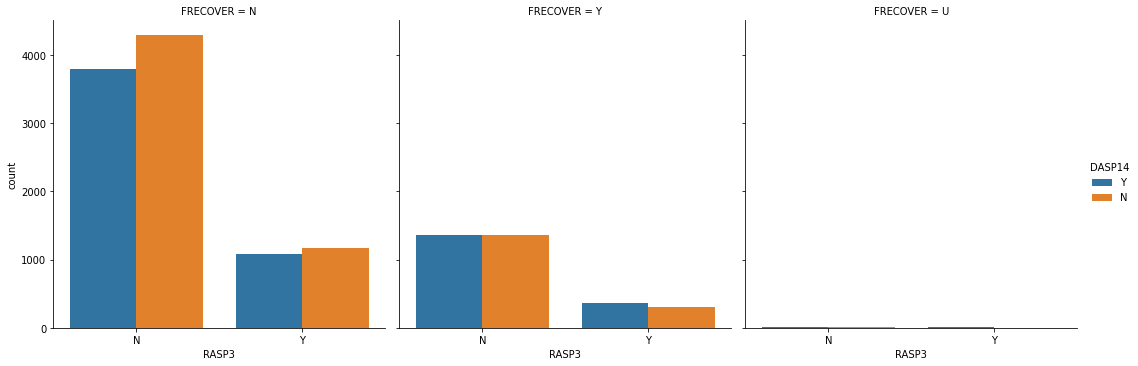

In [173]:
sns.catplot(x="RASP3", col="FRECOVER", hue ='DASP14', data=df,kind="count")

In [171]:
list_asp_asp6 = df.groupby(by = ['RASP3','DASP14'])['FDEAD'].apply(list)
print()
stat, p = kruskal(list_asp_asp6[0], list_asp_asp6[1],list_asp_asp6[2], list_asp_asp6[3])
print('Kruskal Wallis')
print_stats(stat, p)


Kruskal Wallis
stat = 21.655, p = 0.000
Probably different distributions


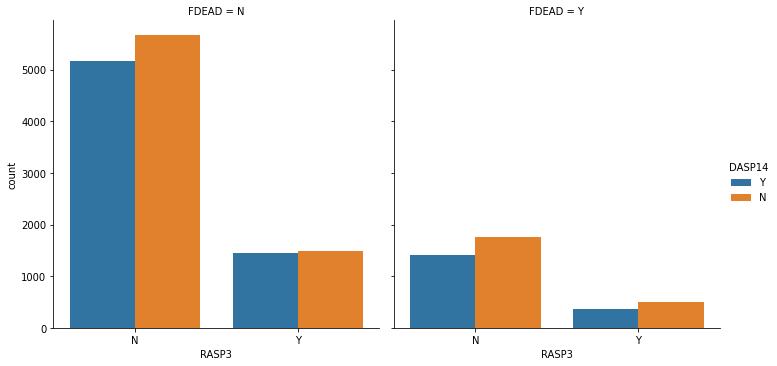

In [172]:
sns.catplot(x="RASP3", col="FDEAD", hue ='DASP14', data=df,kind="count")

In [170]:
list_asp_asp6 = df.groupby(by = ['RASP3','DASP14'])['OCCODE'].apply(list)


Kruskal Wallis
stat = 46.328, p = 0.000
Probably different distributions


In [61]:
list_asp_asp6

RASP3  DASP14
N      N         [Dead, Dead, Dependent, Dependent, Recovered, ...
       Y         [Not recovered, Dependent, Recovered, Dependen...
Y      N         [Dependent, Dead, Dependent, Dependent, Dead, ...
       Y         [Dead, Recovered, Dependent, Dead, Dead, Depen...
Name: OCCODE, dtype: object

In [62]:
print()
stat, p = kruskal(list_asp_asp6[0], list_asp_asp6[1],list_asp_asp6[2], list_asp_asp6[3])
print('Kruskal Wallis')
print_stats(stat, p)


Kruskal Wallis
stat = 46.487, p = 0.000
Probably different distributions


In [84]:
iterator = product(enumerate(list_asp_asp6), enumerate(list_asp_asp6))
for (first_idx, first_group), (second_idx, second_group) in iterator:
    print(first_idx, second_idx)
    stat, p = mannwhitneyu(first_group, second_group)
    print_stats(stat, p)
    print()

0 0
stat = 27639612.500, p = 0.500
Probably the same distribution

0 1
stat = 23420531.500, p = 0.000
Probably different distributions

0 2
stat = 7036874.000, p = 0.001
Probably different distributions

0 3
stat = 6579504.000, p = 0.033
Probably different distributions

1 0
stat = 23420531.500, p = 0.000
Probably different distributions

1 1
stat = 21720640.500, p = 0.500
Probably the same distribution

1 2
stat = 5948048.000, p = 0.000
Probably different distributions

1 3
stat = 5878422.000, p = 0.098
Probably the same distribution

2 0
stat = 7036874.000, p = 0.001
Probably different distributions

2 1
stat = 5948048.000, p = 0.000
Probably different distributions

2 2
stat = 1952288.000, p = 0.500
Probably the same distribution

2 3
stat = 1670880.000, p = 0.000
Probably different distributions

3 0
stat = 6579504.000, p = 0.033
Probably different distributions

3 1
stat = 5878422.000, p = 0.098
Probably the same distribution

3 2
stat = 1670880.000, p = 0.000
Probably different d

In [64]:
group_asp_asp['OCCODE'].value_counts()

RASP3  DASP14  OCCODE       
N      N       Dependent        3061
               Dead             1712
               Not recovered    1445
               Recovered        1217
       Y       Dependent        2608
               Not recovered    1388
               Dead             1376
               Recovered        1219
Y      N       Dependent         867
               Dead              482
               Not recovered     351
               Recovered         276
       Y       Dependent         823
               Dead              348
               Not recovered     335
               Recovered         312
Name: OCCODE, dtype: int64

In [66]:
rn_dn_dep = group_asp_asp['OCCODE'].value_counts()[0]
rn_dn_d = group_asp_asp['OCCODE'].value_counts()[1]
rn_dn_nr = group_asp_asp['OCCODE'].value_counts()[2]
rn_dn_r = group_asp_asp['OCCODE'].value_counts()[3]

rn_dy_dep = group_asp_asp['OCCODE'].value_counts()[4]
rn_dy_d = group_asp_asp['OCCODE'].value_counts()[6]
rn_dy_nr = group_asp_asp['OCCODE'].value_counts()[5]
rn_dy_r = group_asp_asp['OCCODE'].value_counts()[7]

ry_dn_dep = group_asp_asp['OCCODE'].value_counts()[8]
ry_dn_d = group_asp_asp['OCCODE'].value_counts()[9]
ry_dn_nr = group_asp_asp['OCCODE'].value_counts()[10]
ry_dn_r = group_asp_asp['OCCODE'].value_counts()[11]

ry_dy_dep = group_asp_asp['OCCODE'].value_counts()[12]
ry_dy_d = group_asp_asp['OCCODE'].value_counts()[13]
ry_dy_nr = group_asp_asp['OCCODE'].value_counts()[14]
ry_dy_r = group_asp_asp['OCCODE'].value_counts()[15]

In [70]:
print(f'Percentage of patients recovered after 6 months:')
print()
print(f"--- No aspirin prior to stroke ---")
print(f'No aspirin during study: {round((rn_dn_r / (rn_dn_dep + rn_dn_d + rn_dn_nr + rn_dn_r) * 100),1)} %')
print(f'Aspirin during study: {round((rn_dy_r  / (rn_dy_dep + rn_dy_d + rn_dy_nr + rn_dy_r) * 100),1)} %')
print()
print(f"--- Aspirin prior to stroke ---")
print(f'No aspirin during study: {round((ry_dn_r / (ry_dn_dep + ry_dn_d + ry_dn_nr + ry_dn_r) * 100),1)} %')
print(f'Aspirin during study: {round((ry_dy_r / (ry_dy_dep + ry_dy_d + ry_dy_nr + ry_dy_r) * 100),1)} %')
print()
print()
print(f'Percentage of patients not recovered after 6 months:')
print()
print(f"--- No aspirin prior to stroke ---")
print(f'No aspirin during study: {round((rn_dn_nr / (rn_dn_dep + rn_dn_d + rn_dn_nr + rn_dn_r) * 100),1)} %')
print(f'Aspirin during study: {round((rn_dy_nr  / (rn_dy_dep + rn_dy_d + rn_dy_nr + rn_dy_r) * 100),1)} %')
print()
print(f"--- Aspirin prior to stroke ---")
print(f'No aspirin during study: {round((ry_dn_nr / (ry_dn_dep + ry_dn_d + ry_dn_nr + ry_dn_r) * 100),1)} %')
print(f'Aspirin during study: {round((ry_dy_nr / (ry_dy_dep + ry_dy_d + ry_dy_nr + ry_dy_r) * 100),1)} %')
print()
print()
print(f'Percentage of patients dependent after 6 months:')
print()
print(f"--- No aspirin prior to stroke ---")
print(f'No aspirin during study: {round((rn_dn_dep / (rn_dn_dep + rn_dn_d + rn_dn_nr + rn_dn_r) * 100),1)} %')
print(f'Aspirin during study: {round((rn_dy_dep  / (rn_dy_dep + rn_dy_d + rn_dy_nr + rn_dy_r) * 100),1)} %')
print()
print(f"--- Aspirin prior to stroke ---")
print(f'No aspirin during study: {round((ry_dn_dep / (ry_dn_dep + ry_dn_d + ry_dn_nr + ry_dn_r) * 100),1)} %')
print(f'Aspirin during study: {round((ry_dy_dep / (ry_dy_dep + ry_dy_d + ry_dy_nr + ry_dy_r) * 100),1)} %')

Percentage of patients recovered after 6 months:

--- No aspirin prior to stroke ---
No aspirin during study: 16.4 %
Aspirin during study: 18.5 %

--- Aspirin prior to stroke ---
No aspirin during study: 14.0 %
Aspirin during study: 17.2 %


Percentage of patients not recovered after 6 months:

--- No aspirin prior to stroke ---
No aspirin during study: 19.4 %
Aspirin during study: 21.1 %

--- Aspirin prior to stroke ---
No aspirin during study: 17.8 %
Aspirin during study: 18.4 %


Percentage of patients dependent after 6 months:

--- No aspirin prior to stroke ---
No aspirin during study: 41.2 %
Aspirin during study: 39.6 %

--- Aspirin prior to stroke ---
No aspirin during study: 43.9 %
Aspirin during study: 45.3 %


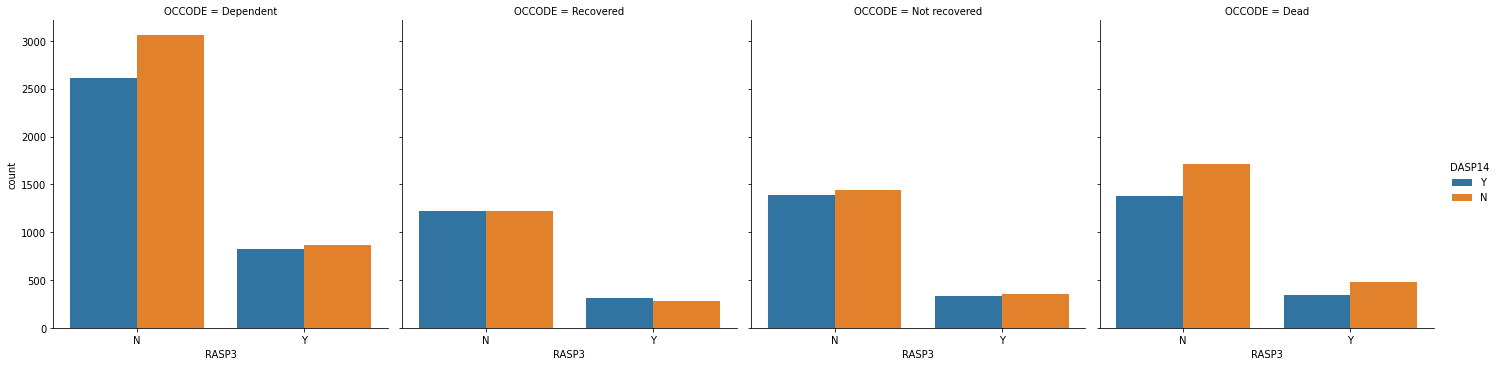

In [95]:
sns.catplot(x="RASP3", col="OCCODE", hue ='DASP14', data=df,kind="count")

## Aspirin vs non-aspirin subdivided in hours between onset and randomisation (3, 6, 12, 24, 48)

### Outcome after 14 days

In [71]:
list_asp_delay14 = df.groupby(by = ['DASP14', 'RDELAY_bin'])['DDEAD'].apply(list)

In [72]:
list_asp_delay14

DASP14  RDELAY_bin
N       0 - 3         [N, N, N, N, N, N, N, N, N, N, N, N, N, Y, N, ...
        13 - 24       [N, N, N, N, N, N, Y, N, N, N, N, N, N, N, N, ...
        25 - 48       [N, N, N, Y, N, N, N, N, N, N, N, N, N, N, N, ...
        4 - 6         [N, N, N, Y, N, N, N, N, N, N, N, N, Y, N, N, ...
        7 - 12        [N, N, N, N, Y, N, N, N, N, N, Y, N, Y, N, N, ...
Y       0 - 3         [N, N, N, N, N, N, N, N, N, Y, Y, Y, N, N, N, ...
        13 - 24       [N, N, N, N, Y, N, N, N, N, N, N, Y, N, N, N, ...
        25 - 48       [N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...
        4 - 6         [Y, N, N, N, N, Y, N, N, N, N, N, N, N, N, N, ...
        7 - 12        [N, N, N, N, N, N, N, N, N, N, Y, N, N, N, N, ...
Name: DDEAD, dtype: object

In [74]:
stat, p = kruskal(list_asp_delay14[0], list_asp_delay14[1], list_asp_delay14[2],list_asp_delay14[3], list_asp_delay14[4], 
                list_asp_delay14[5], list_asp_delay14[6], list_asp_delay14[7],list_asp_delay14[8], list_asp_delay14[9])
print_stats(stat, p)

stat = 111.943, p = 0.000
Probably different distributions


In [75]:
data_asp_delay14x = [list_asp_delay14[0], list_asp_delay14[1], list_asp_delay14[2],list_asp_delay14[3], list_asp_delay14[4], 
                list_asp_delay14[5], list_asp_delay14[6], list_asp_delay14[7],list_asp_delay14[8], list_asp_delay14[9]]
data_asp_delay14y = [list_asp_delay14[0], list_asp_delay14[1], list_asp_delay14[2],list_asp_delay14[3], list_asp_delay14[4], 
                list_asp_delay14[5], list_asp_delay14[6], list_asp_delay14[7],list_asp_delay14[8], list_asp_delay14[9]]

In [76]:
iterator = product(enumerate(data_asp_delay14x), enumerate(data_asp_delay14y))
for (first_idx, first_group), (second_idx, second_group) in iterator:
    print(first_idx, second_idx)
    stat, p = mannwhitneyu(first_group, second_group)
    print_stats(stat, p)
    print()

0 0
stat = 102604.500, p = 0.500
Probably the same distribution

0 1
stat = 588215.000, p = 0.000
Probably different distributions

0 2
stat = 691958.500, p = 0.000
Probably different distributions

0 3
stat = 264004.500, p = 0.062
Probably the same distribution

0 4
stat = 450732.000, p = 0.000
Probably different distributions

0 5
stat = 78008.000, p = 0.075
Probably the same distribution

0 6
stat = 530342.500, p = 0.000
Probably different distributions

0 7
stat = 617024.500, p = 0.000
Probably different distributions

0 8
stat = 217590.000, p = 0.003
Probably different distributions

0 9
stat = 385212.500, p = 0.000
Probably different distributions

1 0
stat = 588215.000, p = 0.000
Probably different distributions

1 1
stat = 3920000.000, p = 0.500
Probably the same distribution

1 2
stat = 4618290.000, p = 0.007
Probably different distributions

1 3
stat = 1614465.000, p = 0.000
Probably different distributions

1 4
stat = 3002275.000, p = 0.489
Probably the same distribution

1 

In [78]:
iterator = product(enumerate(list_asp_delay14), enumerate(list_asp_delay14))
for (first_idx, first_group), (second_idx, second_group) in iterator:
    print(first_idx, second_idx)
    stat, p = mannwhitneyu(first_group, second_group)
    print_stats(stat, p)
    print()

0 0
stat = 102604.500, p = 0.500
Probably the same distribution

0 1
stat = 588215.000, p = 0.000
Probably different distributions

0 2
stat = 691958.500, p = 0.000
Probably different distributions

0 3
stat = 264004.500, p = 0.062
Probably the same distribution

0 4
stat = 450732.000, p = 0.000
Probably different distributions

0 5
stat = 78008.000, p = 0.075
Probably the same distribution

0 6
stat = 530342.500, p = 0.000
Probably different distributions

0 7
stat = 617024.500, p = 0.000
Probably different distributions

0 8
stat = 217590.000, p = 0.003
Probably different distributions

0 9
stat = 385212.500, p = 0.000
Probably different distributions

1 0
stat = 588215.000, p = 0.000
Probably different distributions

1 1
stat = 3920000.000, p = 0.500
Probably the same distribution

1 2
stat = 4618290.000, p = 0.007
Probably different distributions

1 3
stat = 1614465.000, p = 0.000
Probably different distributions

1 4
stat = 3002275.000, p = 0.489
Probably the same distribution

1 

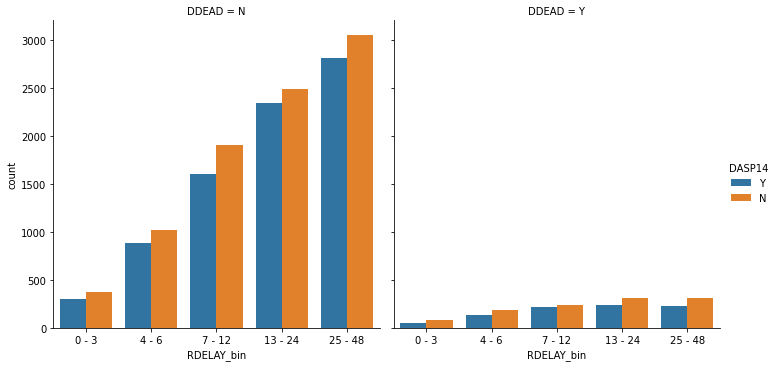

In [94]:
sns.catplot(x="RDELAY_bin", col="DDEAD", hue ='DASP14', data=df,kind="count", order = ['0 - 3', '4 - 6', '7 - 12', '13 - 24', '25 - 48'])

There are differences between those groups. Let's check which groups differ significantly.

Patients who did receive aspirin in the study, show a difference when comparing joining the study within 3 hours or 48 hours after their stroke. 

There is a difference in putcome when comparing patients who received aspirin and joined the study within 3 hours after their stroke with patients who did not receive aspirin and joined the study within 12, 24 and 48 hours after their stroke.

### Outcome after 6 months

In [174]:
list_asp_delay6 = df.groupby(by = ['DASP14', 'RDELAY_bin'])['FRECOVER'].apply(list)
stat, p = kruskal(list_asp_delay6[0], list_asp_delay6[1], list_asp_delay6[2],list_asp_delay6[3], list_asp_delay6[4], 
                list_asp_delay6[5], list_asp_delay6[6], list_asp_delay6[7],list_asp_delay6[8], list_asp_delay6[9])
print_stats(stat, p)

stat = 76.620, p = 0.000
Probably different distributions


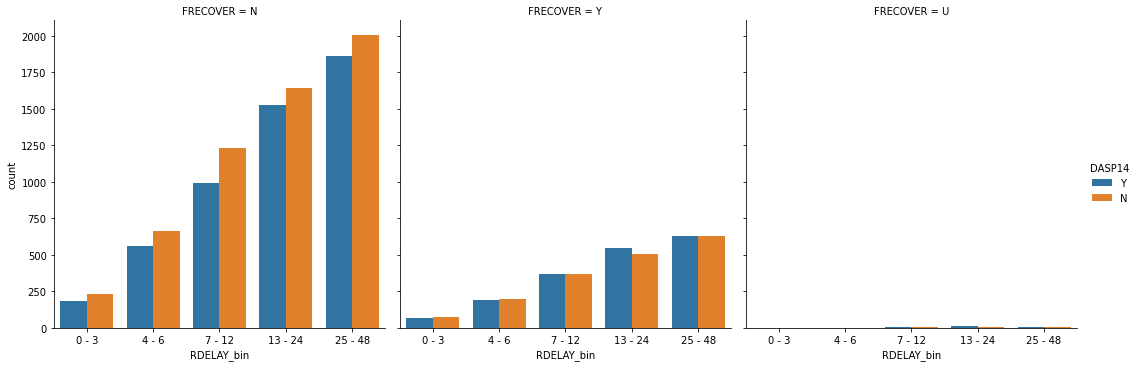

In [176]:
sns.catplot(x="RDELAY_bin", col="FRECOVER", hue ='DASP14', data=df,kind="count", order = ['0 - 3', '4 - 6', '7 - 12', '13 - 24', '25 - 48'])

In [177]:
list_asp_delay6 = df.groupby(by = ['DASP14', 'RDELAY_bin'])['FDEAD'].apply(list)
stat, p = kruskal(list_asp_delay6[0], list_asp_delay6[1], list_asp_delay6[2],list_asp_delay6[3], list_asp_delay6[4], 
                list_asp_delay6[5], list_asp_delay6[6], list_asp_delay6[7],list_asp_delay6[8], list_asp_delay6[9])
print_stats(stat, p)

stat = 126.248, p = 0.000
Probably different distributions


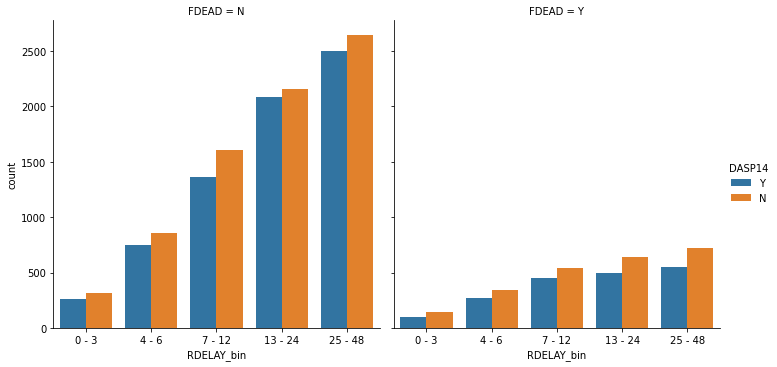

In [178]:
sns.catplot(x="RDELAY_bin", col="FDEAD", hue ='DASP14', data=df,kind="count", order = ['0 - 3', '4 - 6', '7 - 12', '13 - 24', '25 - 48'])

In [86]:
list_asp_delay6 = df.groupby(by = ['DASP14', 'RDELAY_bin'])['OCCODE'].apply(list)

In [87]:
list_asp_delay6

DASP14  RDELAY_bin
N       0 - 3         [Not recovered, Dependent, Dependent, Dead, De...
        13 - 24       [Not recovered, Dependent, Recovered, Dependen...
        25 - 48       [Not recovered, Not recovered, Not recovered, ...
        4 - 6         [Recovered, Not recovered, Dependent, Dead, De...
        7 - 12        [Dependent, Dependent, Dependent, Not recovere...
Y       0 - 3         [Dependent, Recovered, Recovered, Recovered, D...
        13 - 24       [Dependent, Dependent, Not recovered, Not reco...
        25 - 48       [Dependent, Not recovered, Not recovered, Not ...
        4 - 6         [Dead, Dependent, Dependent, Not recovered, De...
        7 - 12        [Dependent, Dependent, Dependent, Dependent, N...
Name: OCCODE, dtype: object

In [88]:
stat, p = kruskal(list_asp_delay6[0], list_asp_delay6[1], list_asp_delay6[2],list_asp_delay6[3], list_asp_delay6[4], 
                list_asp_delay6[5], list_asp_delay6[6], list_asp_delay6[7],list_asp_delay6[8], list_asp_delay6[9])
print_stats(stat, p)

stat = 131.437, p = 0.000
Probably different distributions


In [89]:
iterator = product(enumerate(list_asp_delay6), enumerate(list_asp_delay6))
for (first_idx, first_group), (second_idx, second_group) in iterator:
    print(first_idx, second_idx)
    stat, p = mannwhitneyu(first_group, second_group)
    print_stats(stat, p)
    print()

0 0
stat = 102604.500, p = 0.500
Probably the same distribution

0 1
stat = 560366.500, p = 0.000
Probably different distributions

0 2
stat = 657062.000, p = 0.000
Probably different distributions

0 3
stat = 264238.500, p = 0.157
Probably the same distribution

0 4
stat = 442056.000, p = 0.001
Probably different distributions

0 5
stat = 76648.000, p = 0.078
Probably the same distribution

0 6
stat = 485835.500, p = 0.000
Probably different distributions

0 7
stat = 563592.500, p = 0.000
Probably different distributions

0 8
stat = 211506.000, p = 0.004
Probably different distributions

0 9
stat = 363568.000, p = 0.000
Probably different distributions

1 0
stat = 560366.500, p = 0.000
Probably different distributions

1 1
stat = 3920000.000, p = 0.500
Probably the same distribution

1 2
stat = 4611211.000, p = 0.074
Probably the same distribution

1 3
stat = 1537727.500, p = 0.000
Probably different distributions

1 4
stat = 2925276.500, p = 0.050
Probably the same distribution

1 5


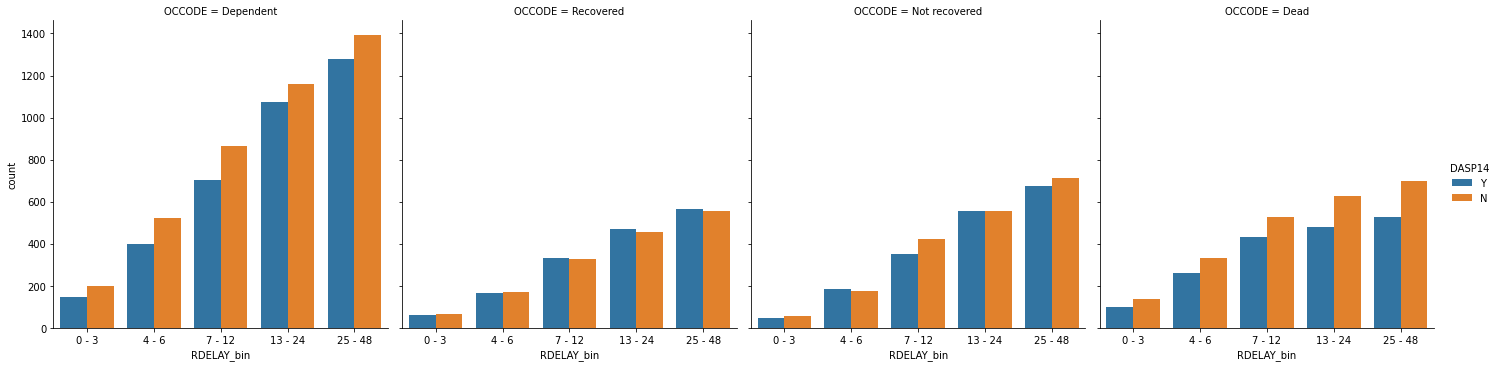

In [93]:
sns.catplot(x="RDELAY_bin", col="OCCODE", hue ='DASP14', data=df,kind="count", order = ['0 - 3', '4 - 6', '7 - 12', '13 - 24', '25 - 48'])

## Heparin vs non-heparin


### Outcome after 14 days

In [103]:
list_hep14 = df.groupby(by = ['RXHEP14'])['DDEAD'].apply(list)

In [104]:
list_hep14

RXHEP14
N    [N, N, N, N, N, N, N, Y, Y, N, N, N, N, N, N, ...
Y    [N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...
Name: DDEAD, dtype: object

In [105]:
stat, p = kruskal(list_hep14[0], list_hep14[1])
print_stats(stat, p)

stat = 0.756, p = 0.385
Probably the same distribution


After 14 days: No difference between heparin and no heparin.

### Outcome after 6 months

In [179]:
list_hep6 = df.groupby(by = ['RXHEP14'])['FRECOVER'].apply(list)
stat, p = kruskal(list_hep6[0] , list_hep6[1])
print_stats(stat, p)

stat = 0.552, p = 0.458
Probably the same distribution


In [180]:
list_hep6 = df.groupby(by = ['RXHEP14'])['FDEAD'].apply(list)
stat, p = kruskal(list_hep6[0] , list_hep6[1])
print_stats(stat, p)

stat = 0.877, p = 0.349
Probably the same distribution


In [107]:
list_hep6 = df.groupby(by = ['RXHEP14'])['OCCODE'].apply(list)

In [109]:
list_hep6

RXHEP14
N    [Dependent, Dependent, Not recovered, Dependen...
Y    [Dependent, Recovered, Dependent, Not recovere...
Name: OCCODE, dtype: object

In [108]:
stat, p = kruskal(list_hep6[0] , list_hep6[1])
print_stats(stat, p)

stat = 5.679, p = 0.017
Probably different distributions


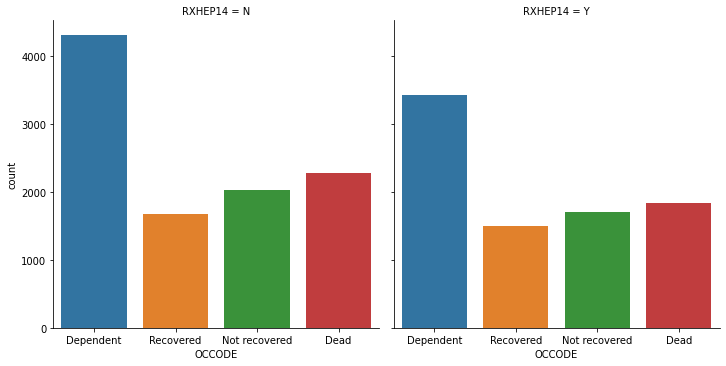

In [113]:
sns.catplot(x='OCCODE', col ='RXHEP14', data=df,kind="count")

## No vs low vs medium heparin


## Outcome after 14 days

In [115]:
list2_hep14 = df.groupby(by = ['HEP14'])['DDEAD'].apply(list)

In [116]:
list2_hep14 

HEP14
L    [N, N, N, N, N, N, N, N, N, N, N, Y, N, N, N, ...
M    [N, N, N, N, N, N, N, N, N, Y, N, Y, N, N, N, ...
N    [N, N, N, N, N, N, N, Y, Y, N, N, N, N, N, N, ...
Name: DDEAD, dtype: object

In [117]:
stat, p = kruskal(list2_hep14[0], list2_hep14[1], list2_hep14[2])
print_stats(stat, p)

stat = 2.035, p = 0.362
Probably the same distribution


After 14 days: No difference between low, medium and no heparin.

### Outcome after 6 months

In [181]:
list2_hep6 = df.groupby(by = ['HEP14'])['FRECOVER'].apply(list)
stat, p = kruskal(list2_hep6[0], list2_hep6[1], list2_hep6[2])
print_stats(stat, p)

stat = 0.756, p = 0.685
Probably the same distribution


In [182]:
list2_hep6 = df.groupby(by = ['HEP14'])['FDEAD'].apply(list)
stat, p = kruskal(list2_hep6[0], list2_hep6[1], list2_hep6[2])
print_stats(stat, p)

stat = 1.050, p = 0.592
Probably the same distribution


In [119]:
list2_hep6 = df.groupby(by = ['HEP14'])['OCCODE'].apply(list)

In [120]:
stat, p = kruskal(list2_hep6[0], list2_hep6[1], list2_hep6[2])
print_stats(stat, p)

stat = 5.865, p = 0.053
Probably the same distribution


In [121]:
iterator = product(enumerate(list2_hep6), enumerate(list2_hep6))
for (first_idx, first_group), (second_idx, second_group) in iterator:
    print(first_idx, second_idx)
    stat, p = mannwhitneyu(first_group, second_group)
    print_stats(stat, p)
    print()

0 0
stat = 9383112.000, p = 0.500
Probably the same distribution

0 1
stat = 8918638.500, p = 0.333
Probably the same distribution

0 2
stat = 21977641.500, p = 0.046
Probably different distributions

1 0
stat = 8918638.500, p = 0.333
Probably the same distribution

1 1
stat = 8565660.500, p = 0.500
Probably the same distribution

1 2
stat = 20888907.500, p = 0.015
Probably different distributions

2 0
stat = 21977641.500, p = 0.046
Probably different distributions

2 1
stat = 20888907.500, p = 0.015
Probably different distributions

2 2
stat = 53240880.500, p = 0.500
Probably the same distribution



After 6 months: No difference between different heparin treatments. 
Though, with Mann-Whitney-Test between single groups: slight difference between 'no heparin' and 'low heparin' (p = 0.046)

## Heparin vs non-heparin subdivided in prior heparin

### Outcome after 14 days

In [122]:
list_hep_hep14 = df.groupby(by = ['RHEP24', 'HEP14'])['DDEAD'].apply(list)

In [124]:
list_hep_hep14

RHEP24  HEP14
N       L        [Y, N, N, N, N, N, N, N, N, N, Y, N, N, N, N, ...
        M        [N, N, N, N, N, N, N, Y, N, N, N, N, N, N, N, ...
        N        [N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...
Y       L        [N, N, N, Y, Y, N, N, N, N, N, N, N, N, N, N, ...
        M        [N, Y, N, N, Y, N, N, N, Y, N, N, N, N, N, N, ...
        N        [N, N, N, N, Y, N, N, N, N, N, N, N, N, N, N, ...
Name: DDEAD, dtype: object

In [125]:
stat, p = kruskal(list_hep_hep14[0], list_hep_hep14[1], list_hep_hep14[2], list_hep_hep14[3], list_hep_hep14[4], list_hep_hep14[5])
print_stats(stat, p)

stat = 5.589, p = 0.348
Probably the same distribution


No difference.

### Outcome after 6 months

In [183]:
list_hep_hep6 = df.groupby(by = ['RHEP24', 'HEP14'])['FRECOVER'].apply(list)
stat, p = kruskal(list_hep_hep6[0], list_hep_hep6[1], list_hep_hep6[2], list_hep_hep6[3], list_hep_hep6[4], list_hep_hep6[5])
print_stats(stat, p)

stat = 5.742, p = 0.332
Probably the same distribution


In [184]:
list_hep_hep6 = df.groupby(by = ['RHEP24', 'HEP14'])['FDEAD'].apply(list)
stat, p = kruskal(list_hep_hep6[0], list_hep_hep6[1], list_hep_hep6[2], list_hep_hep6[3], list_hep_hep6[4], list_hep_hep6[5])
print_stats(stat, p)

stat = 3.968, p = 0.554
Probably the same distribution


In [126]:
list_hep_hep6 = df.groupby(by = ['RHEP24', 'HEP14'])['OCCODE'].apply(list)

In [127]:
list_hep_hep6

RHEP24  HEP14
N       L        [Dead, Recovered, Not recovered, Not recovered...
        M        [Dependent, Not recovered, Recovered, Not reco...
        N        [Recovered, Dependent, Not recovered, Dead, De...
Y       L        [Dependent, Dead, Not recovered, Dead, Dead, D...
        M        [Recovered, Dead, Dependent, Dependent, Dead, ...
        N        [Dependent, Dead, Dependent, Dead, Dead, Depen...
Name: OCCODE, dtype: object

In [128]:
stat, p = kruskal(list_hep_hep6[0], list_hep_hep6[1], list_hep_hep6[2], list_hep_hep6[3], list_hep_hep6[4], list_hep_hep6[5])
print_stats(stat, p)

stat = 9.097, p = 0.105
Probably the same distribution


In [ ]:
No difference.

## Heparin vs non-heparin subdivided in hours between onset and randomisation (3, 6, 12, 24, 48)

### Outcome after 14 days

In [130]:
list_hep_delay14 = df.groupby(by = ['HEP14', 'RDELAY_bin'])['DDEAD'].apply(list)

In [131]:
list_hep_delay14

HEP14  RDELAY_bin
L      0 - 3         [N, N, N, N, Y, N, N, N, N, N, N, N, N, N, N, ...
       13 - 24       [N, N, N, N, N, N, N, N, N, N, N, N, N, N, Y, ...
       25 - 48       [N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...
       4 - 6         [Y, N, N, N, N, N, N, N, N, N, Y, N, N, N, N, ...
       7 - 12        [N, N, N, N, Y, N, N, N, N, N, N, N, N, N, N, ...
M      0 - 3         [N, N, N, N, N, N, Y, N, N, N, N, N, Y, N, N, ...
       13 - 24       [N, N, N, N, N, Y, N, N, N, N, N, N, N, N, N, ...
       25 - 48       [N, N, Y, N, N, N, N, N, Y, N, Y, N, N, N, Y, ...
       4 - 6         [N, N, N, N, N, Y, N, N, N, N, N, N, N, Y, N, ...
       7 - 12        [N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...
N      0 - 3         [N, N, N, N, N, N, N, N, N, N, N, N, N, N, Y, ...
       13 - 24       [N, N, N, Y, N, N, Y, N, N, N, N, N, N, N, Y, ...
       25 - 48       [N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...
       4 - 6         [N, Y, N, N, N, N, N, Y, N, N, N, N, Y

In [132]:
stat, p = kruskal(list_hep_delay14[0], list_hep_delay14[1], list_hep_delay14[2], list_hep_delay14[3], list_hep_delay14[4], 
                list_hep_delay14[5], list_hep_delay14[6], list_hep_delay14[7], list_hep_delay14[8], list_hep_delay14[9],
                list_hep_delay14[11], list_hep_delay14[12], list_hep_delay14[13], list_hep_delay14[14])
print_stats(stat, p)

stat = 95.421, p = 0.000
Probably different distributions


In [133]:
iterator = product(enumerate(list_hep_delay14), enumerate(list_hep_delay14))
for (first_idx, first_group), (second_idx, second_group) in iterator:
    print(first_idx, second_idx)
    stat, p = mannwhitneyu(first_group, second_group)
    print_stats(stat, p)
    print()

0 0
stat = 16020.500, p = 0.500
Probably the same distribution

0 1
stat = 105173.500, p = 0.000
Probably different distributions

0 2
stat = 114765.000, p = 0.000
Probably different distributions

0 3
stat = 43240.000, p = 0.045
Probably different distributions

0 4
stat = 73624.500, p = 0.001
Probably different distributions

0 5
stat = 14848.000, p = 0.329
Probably the same distribution

0 6
stat = 99833.500, p = 0.000
Probably different distributions

0 7
stat = 113693.500, p = 0.000
Probably different distributions

0 8
stat = 40702.500, p = 0.092
Probably the same distribution

0 9
stat = 70827.500, p = 0.000
Probably different distributions

0 10
stat = 40011.500, p = 0.146
Probably the same distribution

0 11
stat = 233820.500, p = 0.000
Probably different distributions

0 12
stat = 284993.000, p = 0.000
Probably different distributions

0 13
stat = 105021.000, p = 0.039
Probably different distributions

0 14
stat = 183626.500, p = 0.006
Probably different distributions

1 0
st

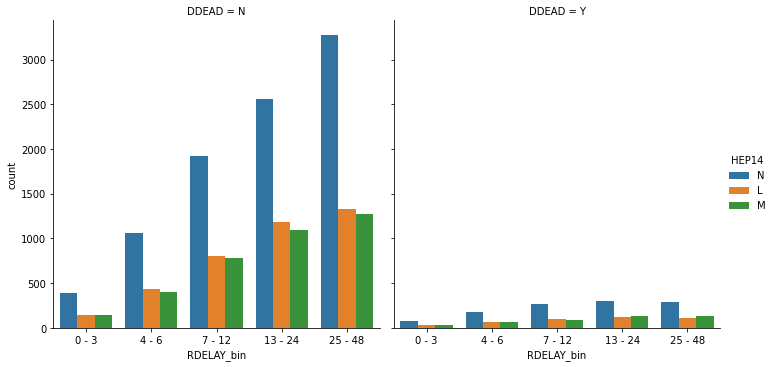

In [140]:
sns.catplot(x="RDELAY_bin", col="DDEAD", hue ='HEP14', data=df,kind="count", order = ['0 - 3', '4 - 6', '7 - 12', '13 - 24', '25 - 48'])

### Outcome after 6 months

In [185]:
list_hep_delay6 = df.groupby(by = ['HEP14', 'RDELAY_bin'])['FRECOVER'].apply(list)
stat, p = kruskal(list_hep_delay6[0], list_hep_delay6[1], list_hep_delay6[2], list_hep_delay6[3], list_hep_delay6[4], 
                list_hep_delay6[5], list_hep_delay6[6], list_hep_delay6[7], list_hep_delay6[8], list_hep_delay6[9],
                list_hep_delay6[11], list_hep_delay6[12], list_hep_delay6[13], list_hep_delay6[14])
print_stats(stat, p)

stat = 73.254, p = 0.000
Probably different distributions


In [186]:
list_hep_delay6 = df.groupby(by = ['HEP14', 'RDELAY_bin'])['FDEAD'].apply(list)
stat, p = kruskal(list_hep_delay6[0], list_hep_delay6[1], list_hep_delay6[2], list_hep_delay6[3], list_hep_delay6[4], 
                list_hep_delay6[5], list_hep_delay6[6], list_hep_delay6[7], list_hep_delay6[8], list_hep_delay6[9],
                list_hep_delay6[11], list_hep_delay6[12], list_hep_delay6[13], list_hep_delay6[14])
print_stats(stat, p)

stat = 104.915, p = 0.000
Probably different distributions


In [137]:
list_hep_delay6 = df.groupby(by = ['HEP14', 'RDELAY_bin'])['OCCODE'].apply(list)

In [138]:
list_hep_delay6 

HEP14  RDELAY_bin
L      0 - 3         [Dead, Dependent, Dead, Dependent, Dead, Recov...
       13 - 24       [Not recovered, Not recovered, Dependent, Depe...
       25 - 48       [Not recovered, Not recovered, Dependent, Dead...
       4 - 6         [Dead, Not recovered, Dependent, Dependent, No...
       7 - 12        [Dependent, Not recovered, Dead, Dependent, De...
M      0 - 3         [Dependent, Recovered, Dependent, Recovered, N...
       13 - 24       [Dependent, Not recovered, Dependent, Dependen...
       25 - 48       [Not recovered, Not recovered, Dead, Dependent...
       4 - 6         [Recovered, Dependent, Dependent, Recovered, D...
       7 - 12        [Dependent, Dependent, Recovered, Recovered, N...
N      0 - 3         [Not recovered, Dependent, Dependent, Dead, De...
       13 - 24       [Dependent, Dependent, Recovered, Dead, Depend...
       25 - 48       [Dependent, Not recovered, Not recovered, Not ...
       4 - 6         [Not recovered, Dead, Dependent, Depen

In [139]:
stat, p = kruskal(list_hep_delay6[0], list_hep_delay6[1], list_hep_delay6[2], list_hep_delay6[3], list_hep_delay6[4], 
                list_hep_delay6[5], list_hep_delay6[6], list_hep_delay6[7], list_hep_delay6[8], list_hep_delay6[9],
                list_hep_delay6[11], list_hep_delay6[12], list_hep_delay6[13], list_hep_delay6[14])
print_stats(stat, p)

stat = 94.483, p = 0.000
Probably different distributions


In [141]:
iterator = product(enumerate(list_hep_delay6), enumerate(list_hep_delay6))
for (first_idx, first_group), (second_idx, second_group) in iterator:
    print(first_idx, second_idx)
    stat, p = mannwhitneyu(first_group, second_group)
    print_stats(stat, p)
    print()

0 0
stat = 16020.500, p = 0.500
Probably the same distribution

0 1
stat = 95679.000, p = 0.000
Probably different distributions

0 2
stat = 108217.000, p = 0.000
Probably different distributions

0 3
stat = 43068.000, p = 0.118
Probably the same distribution

0 4
stat = 71026.000, p = 0.005
Probably different distributions

0 5
stat = 14017.000, p = 0.107
Probably the same distribution

0 6
stat = 92525.000, p = 0.000
Probably different distributions

0 7
stat = 104295.500, p = 0.000
Probably different distributions

0 8
stat = 39824.500, p = 0.094
Probably the same distribution

0 9
stat = 67304.500, p = 0.001
Probably different distributions

0 10
stat = 40197.500, p = 0.266
Probably the same distribution

0 11
stat = 222083.500, p = 0.001
Probably different distributions

0 12
stat = 266308.500, p = 0.000
Probably different distributions

0 13
stat = 103571.500, p = 0.075
Probably the same distribution

0 14
stat = 177630.000, p = 0.012
Probably different distributions

1 0
stat = 

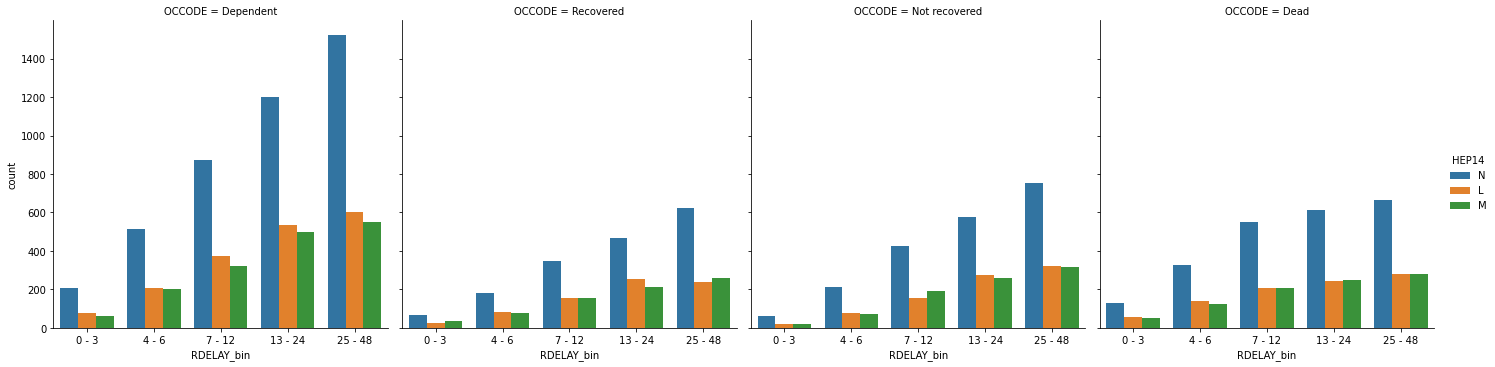

In [142]:
sns.catplot(x="RDELAY_bin", col="OCCODE", hue ='HEP14', data=df,kind="count", order = ['0 - 3', '4 - 6', '7 - 12', '13 - 24', '25 - 48'])

## Combination of aspirin and heparin
(significantly) different outcome than separate effects of aspirin and heparin

In [63]:
df.TREAT14.unique()

array(['Aspirin', 'Low Heparin', 'Medium Heparin',
       'Aspirin + Medium Heparin', 'Control', 'Aspirin + Low Heparin'],
      dtype=object)

### Outcome after 14 days

In [143]:
list_treat14 = df.groupby(by = ['TREAT14'])['DDEAD'].apply(list)

In [144]:
list_treat14

TREAT14
Aspirin                     [N, N, Y, Y, N, N, N, N, N, N, N, N, N, N, N, ...
Aspirin + Low Heparin       [N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...
Aspirin + Medium Heparin    [N, N, N, N, N, Y, N, N, N, N, N, N, N, Y, N, ...
Control                     [N, N, N, N, N, N, N, N, N, N, Y, N, N, N, Y, ...
Low Heparin                 [N, N, N, N, N, Y, N, N, N, N, N, N, N, N, N, ...
Medium Heparin              [N, N, N, N, Y, N, N, N, N, N, N, N, N, N, N, ...
Name: DDEAD, dtype: object

In [145]:
stat, p = kruskal(list_treat14[0], list_treat14[1], list_treat14[2], list_treat14[3],list_treat14[4], list_treat14[5])
print_stats(stat, p)

stat = 14.675, p = 0.012
Probably different distributions


In [146]:
iterator = product(enumerate(list_treat14), enumerate(list_treat14))
for (first_idx, first_group), (second_idx, second_group) in iterator:
    print(first_idx, second_idx)
    stat, p = mannwhitneyu(first_group, second_group)
    print_stats(stat, p)
    print()

0 0
stat = 11007432.000, p = 0.500
Probably the same distribution

0 1
stat = 4971980.000, p = 0.220
Probably the same distribution

0 2
stat = 4646727.500, p = 0.127
Probably the same distribution

0 3
stat = 12954773.500, p = 0.001
Probably different distributions

0 4
stat = 5105552.000, p = 0.083
Probably the same distribution

0 5
stat = 4965158.000, p = 0.080
Probably the same distribution

1 0
stat = 4971980.000, p = 0.220
Probably the same distribution

1 1
stat = 2272712.000, p = 0.500
Probably the same distribution

1 2
stat = 2098778.500, p = 0.052
Probably the same distribution

1 3
stat = 5850916.500, p = 0.001
Probably different distributions

1 4
stat = 2305992.000, p = 0.033
Probably different distributions

1 5
stat = 2242578.000, p = 0.032
Probably different distributions

2 0
stat = 4646727.500, p = 0.127
Probably the same distribution

2 1
stat = 2098778.500, p = 0.052
Probably the same distribution

2 2
stat = 1998000.500, p = 0.500
Probably the same distribution



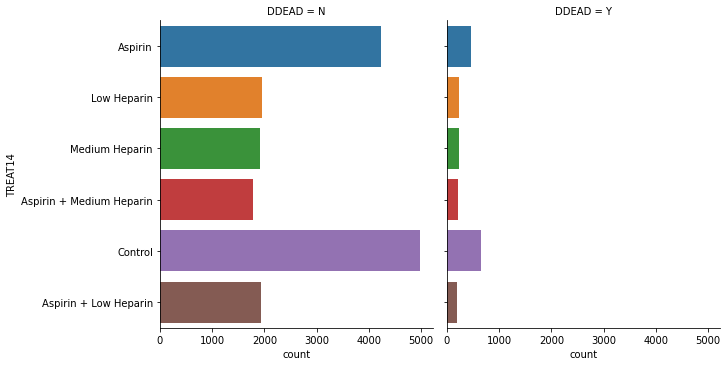

In [148]:
sns.catplot(y="TREAT14", col="DDEAD",data=df,kind="count")

### Outcome after 6 months

In [149]:
list_treat6 = df.groupby(by = ['TREAT14'])['OCCODE'].apply(list)

In [150]:
list_treat6

TREAT14
Aspirin                     [Dependent, Dependent, Dead, Dead, Dependent, ...
Aspirin + Low Heparin       [Not recovered, Dependent, Not recovered, Reco...
Aspirin + Medium Heparin    [Dependent, Not recovered, Dependent, Dependen...
Control                     [Not recovered, Dependent, Recovered, Not reco...
Low Heparin                 [Dependent, Not recovered, Dependent, Recovere...
Medium Heparin              [Recovered, Not recovered, Not recovered, Reco...
Name: OCCODE, dtype: object

In [151]:
stat, p = kruskal(list_treat6[0], list_treat6[1], list_treat6[2], list_treat6[3],list_treat6[4], list_treat6[5])
print_stats(stat, p)

stat = 42.945, p = 0.000
Probably different distributions


In [152]:
iterator = product(enumerate(list_treat6), enumerate(list_treat6))
for (first_idx, first_group), (second_idx, second_group) in iterator:
    print(first_idx, second_idx)
    stat, p = mannwhitneyu(first_group, second_group)
    print_stats(stat, p)
    print()

0 0
stat = 11007432.000, p = 0.500
Probably the same distribution

0 1
stat = 4991736.500, p = 0.445
Probably the same distribution

0 2
stat = 4660267.500, p = 0.335
Probably the same distribution

0 3
stat = 12418896.500, p = 0.000
Probably different distributions

0 4
stat = 4994206.500, p = 0.011
Probably different distributions

0 5
stat = 4893458.000, p = 0.039
Probably different distributions

1 0
stat = 4991736.500, p = 0.445
Probably the same distribution

1 1
stat = 2272712.000, p = 0.500
Probably the same distribution

1 2
stat = 2121914.500, p = 0.403
Probably the same distribution

1 3
stat = 5630761.000, p = 0.000
Probably different distributions

1 4
stat = 2264495.000, p = 0.020
Probably different distributions

1 5
stat = 2218872.500, p = 0.052
Probably the same distribution

2 0
stat = 4660267.500, p = 0.335
Probably the same distribution

2 1
stat = 2121914.500, p = 0.403
Probably the same distribution

2 2
stat = 1998000.500, p = 0.500
Probably the same distribution

In [153]:
list_treat6 = df.groupby(by = ['TREAT14'])['FRECOVER'].apply(list)

In [154]:
stat, p = kruskal(list_treat6[0], list_treat6[1], list_treat6[2], list_treat6[3],list_treat6[4], list_treat6[5])
print_stats(stat, p)

stat = 4.687, p = 0.455
Probably the same distribution


In [187]:
list_treat6 = df.groupby(by = ['TREAT14'])['FDEAD'].apply(list)
stat, p = kruskal(list_treat6[0], list_treat6[1], list_treat6[2], list_treat6[3],list_treat6[4], list_treat6[5])
print_stats(stat, p)

stat = 23.753, p = 0.000
Probably different distributions


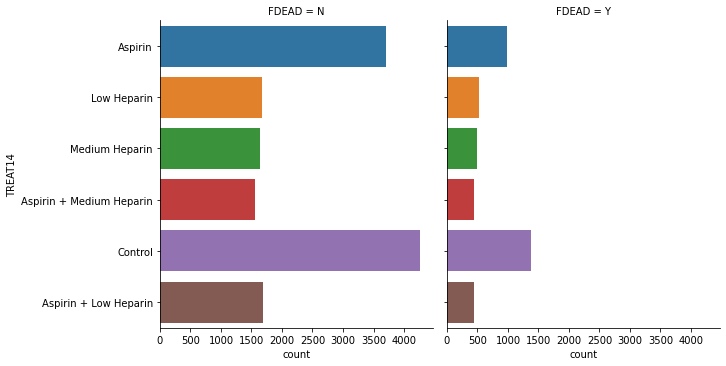

In [190]:
sns.catplot(y="TREAT14", col ="FDEAD", data=df,kind="count")